In [6]:
import torch
import torchaudio
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 16kHz Models

In [7]:
sample_rate = 16000
n_fft_value = 512
hop_length_value = 256
window = np.hanning(n_fft_value)
start = 16000
end = 16250

zoom_spec = sample_rate * 3

In [8]:
def overlap_waveforms(o, t, sample_rate, start, end, title):    

    o_zoom = o[start:end]
    t_zoom = t[start:end]

    # create time vector
    time = range(start, end)

    plt.figure(figsize=(8,8))
    plt.plot(time, o_zoom, alpha=0.75, label="Output")
    plt.plot(time, t_zoom, alpha=0.75, label="Target")
    # plt.plot(time, i_zoom, alpha=0.5, label="Input")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.savefig(f"results/plots/{title}_waves.png")
    plt.show()


def two_spectrograms_difference(o, t, sample_rate, title, zoom_spec):

    o = o[:zoom_spec]
    t = t[:zoom_spec]

    def stft(x, n_fft=512, hop_length=256, window='hann'):
        return np.array([np.fft.rfft(np.hanning(len(x[i:i + n_fft])) * x[i:i + n_fft]) for i in range(0, len(x) - n_fft + 1, hop_length)])

    o_stft = stft(o, n_fft=n_fft_value, hop_length=hop_length_value)
    t_stft = stft(t, n_fft=n_fft_value, hop_length=hop_length_value)
# z_stft = stft(z, n_fft=n_fft_value, hop_length=hop_length_value)

    def mag_to_db(mag, ref=1.0, amin=1e-7):
        magnitude = np.abs(mag)
        log_spec = 20.0 * np.log10(np.maximum(amin, magnitude))
        log_spec -= 20.0 * np.log10(ref)
        return log_spec

    z_stft = t_stft - o_stft

    o_db = mag_to_db(o_stft)
    t_db = mag_to_db(t_stft)
    z_db = mag_to_db(z_stft)

    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

    x_img = axs[0].imshow(o_db.T, origin='lower', aspect='auto', cmap='inferno', extent=[0, len(o) / sample_rate, 0, sample_rate / 2])
    axs[0].set_title('Predicted Output')
    axs[0].set_ylabel('Frequency (Hz)')
    axs[0].set_xlabel('Time (s)')
    fig.colorbar(x_img, ax=axs[0], format='%+2.0f dB')

    y_img = axs[1].imshow(t_db.T, origin='lower', aspect='auto', cmap='inferno', extent=[0, len(t) / sample_rate, 0, sample_rate / 2])
    axs[1].set_title('Target')
    axs[1].set_ylabel('Frequency (Hz)')
    axs[1].set_xlabel('Time (s)')
    fig.colorbar(y_img, ax=axs[1], format='%+2.0f dB')

    z_img = axs[2].imshow(z_db.T, origin='lower', aspect='auto', cmap='bwr', extent=[0, len(o) / sample_rate, 0, sample_rate / 2])
    axs[2].set_title('Target - Output Magnitude Difference')
    axs[2].set_ylabel('Frequency (Hz)')
    axs[2].set_xlabel('Time (s)')
    fig.colorbar(z_img, ax=axs[2], format='%+2.0f dB')

    plt.tight_layout()
    plt.savefig(f"results/plots/{title}_spectra.png")
    plt.show()

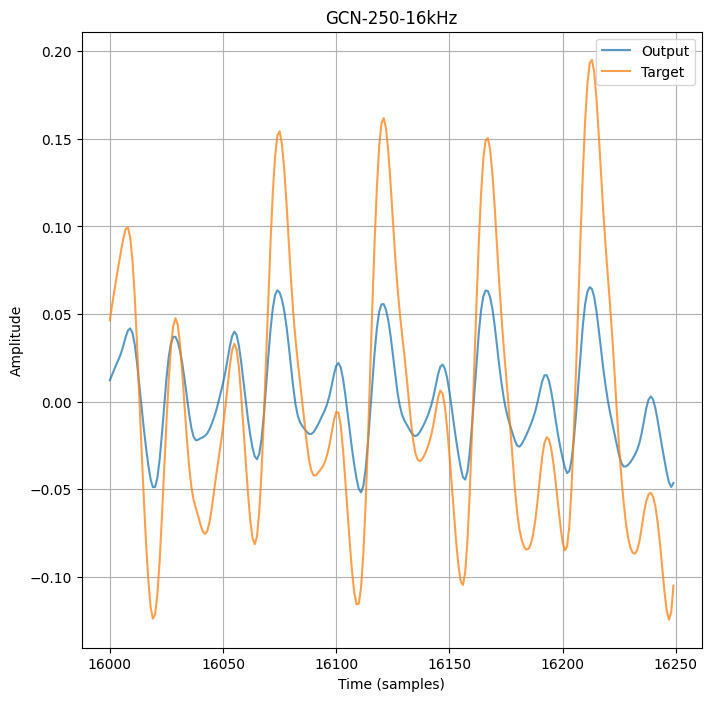

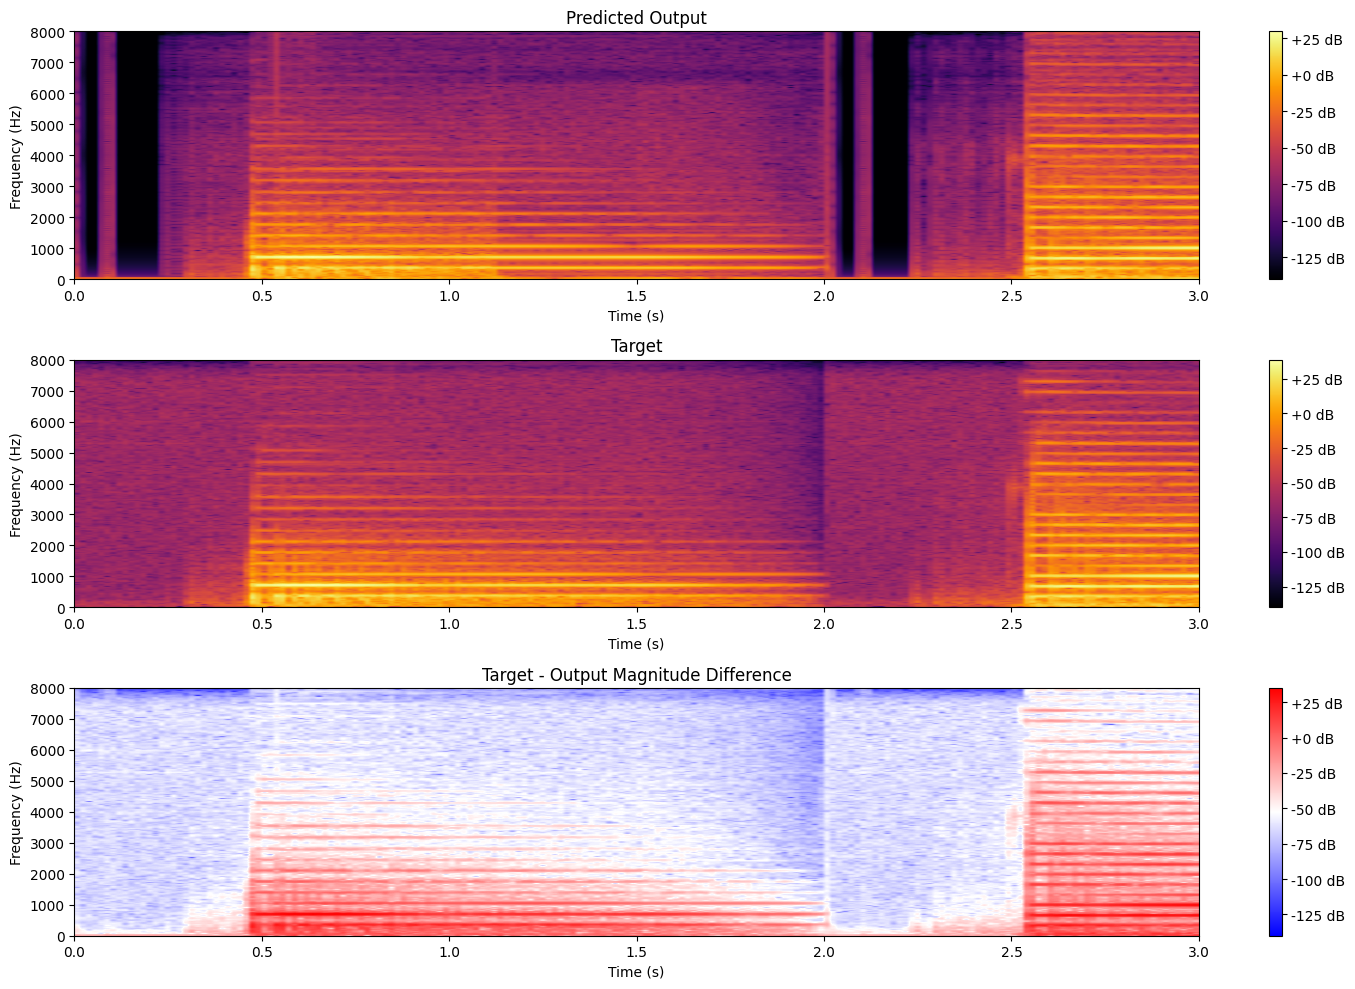

In [9]:
i_p, sample_rate = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_004228/inp_gcn-250.wav")
o_p, sample_rate = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_004228/out_gcn-250.wav")
t_p, t_sr = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_004228/tgt_gcn-250.wav")

i = i_p.numpy().squeeze()
o = o_p.numpy().squeeze()
t = t_p.numpy().squeeze()

title = "GCN-250-16kHz"

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

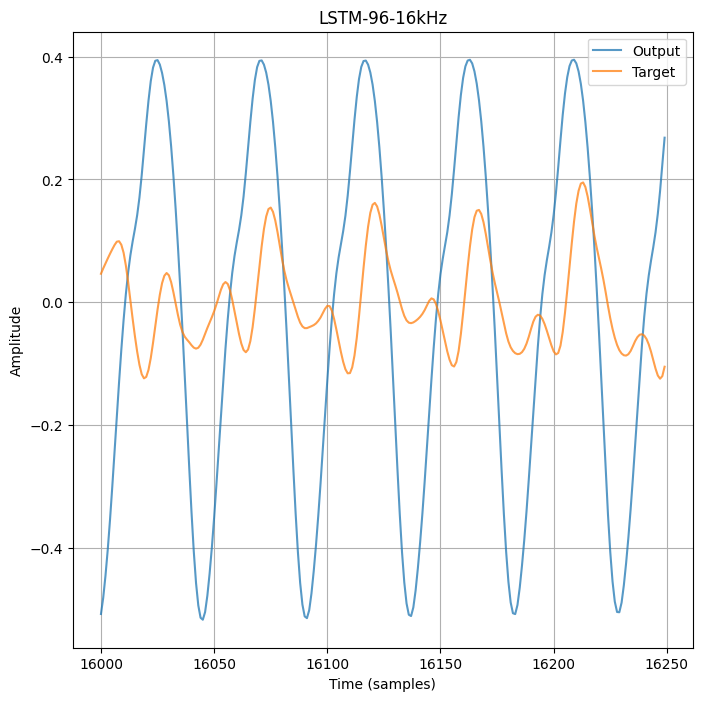

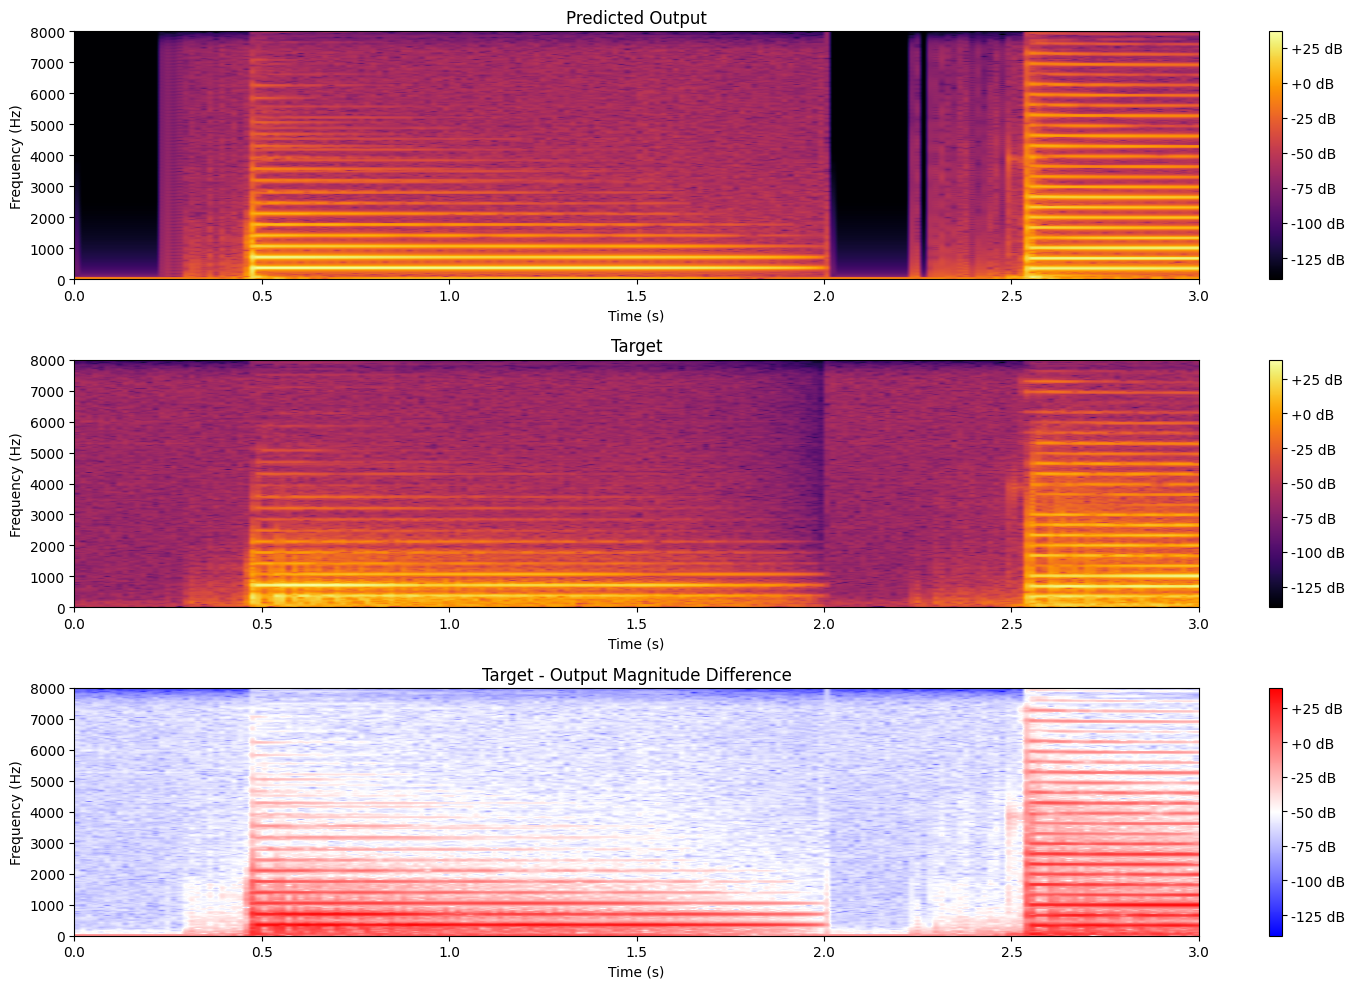

In [10]:
title = "LSTM-96-16kHz"

o_lstm_96_leg, _ = torchaudio.load("results/16k/test/LSTM-96_1000_32_0.001_20230810-062251_20230829_004150/out_LSTM-96.wav")
t_lstm_96_leg, _ = torchaudio.load("results/16k/test/LSTM-96_1000_32_0.001_20230810-062251_20230829_004150/tgt_LSTM-96.wav")

o = o_lstm_96_leg.numpy().squeeze()
t = t_lstm_96_leg.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

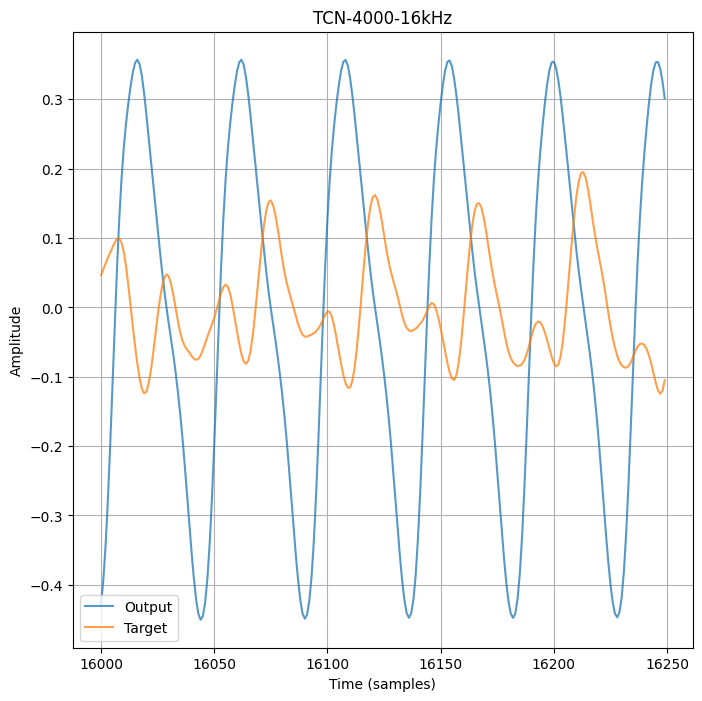

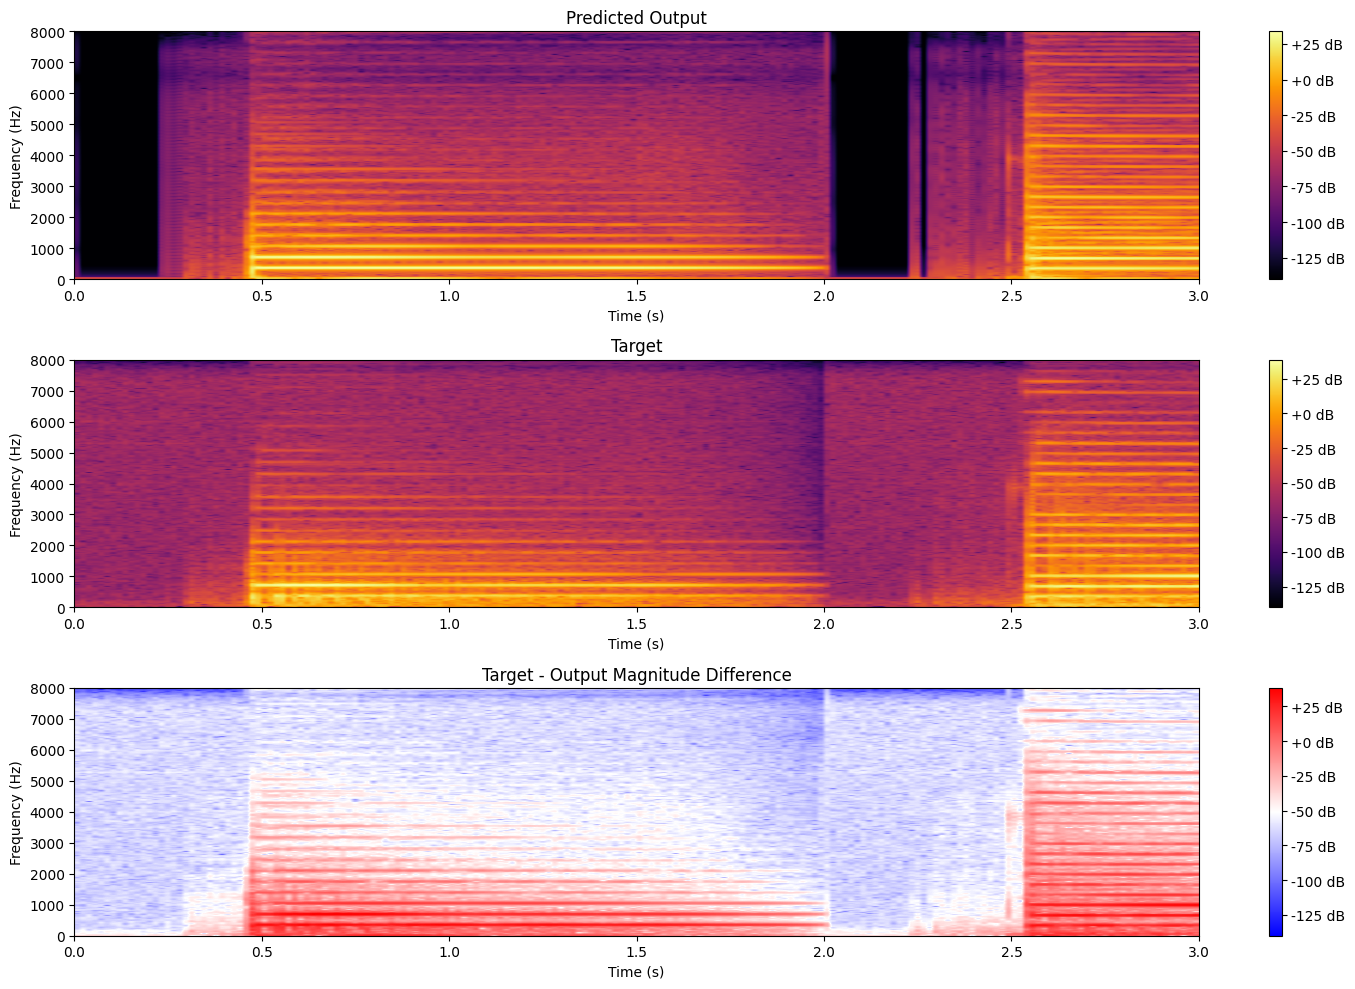

In [11]:
title = "TCN-4000-16kHz"

o_tcn, _ = torchaudio.load("results/16k/test/tcn-4000_20230825-223034_20230829_004313/out_tcn-4000.wav")
t_tcn, _ = torchaudio.load("results/16k/test/tcn-4000_20230825-223034_20230829_004313/tgt_tcn-4000.wav")

o = o_tcn.numpy().squeeze()
t = t_tcn.numpy().squeeze()


overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

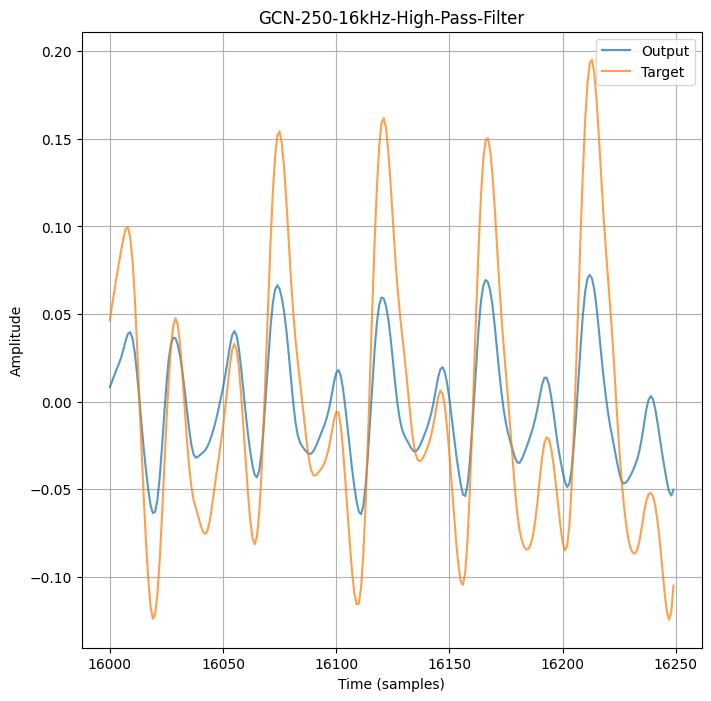

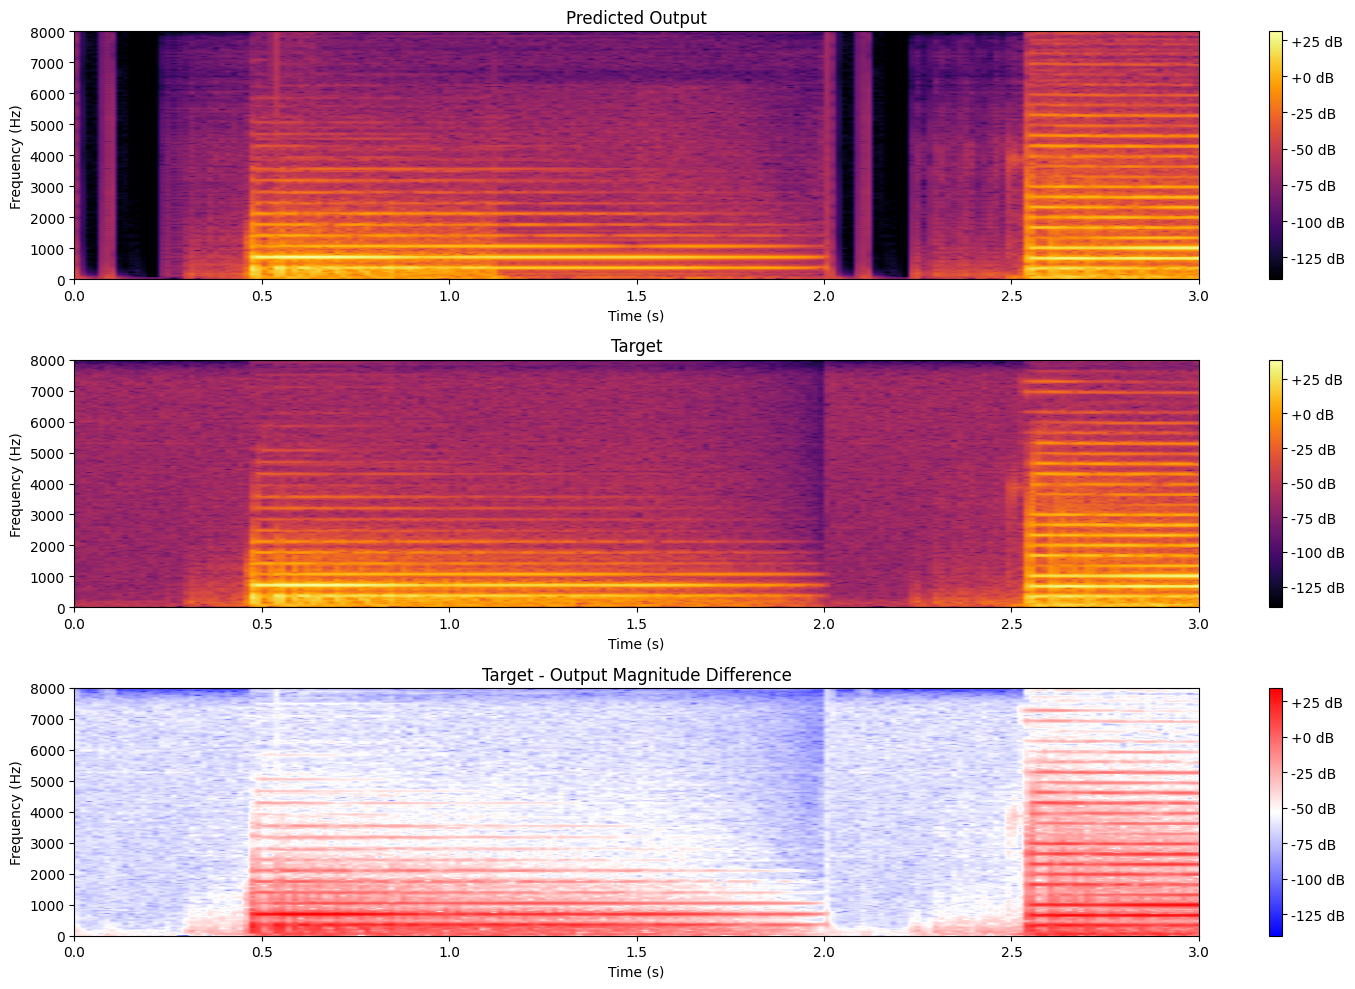

In [12]:
o_p, sample_rate = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_031806/out_gcn-250.wav")
t_p, t_sr = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_031806/tgt_gcn-250.wav")

i = i_p.numpy().squeeze()
o = o_p.numpy().squeeze()
t = t_p.numpy().squeeze()

title = "GCN-250-16kHz-High-Pass-Filter"

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

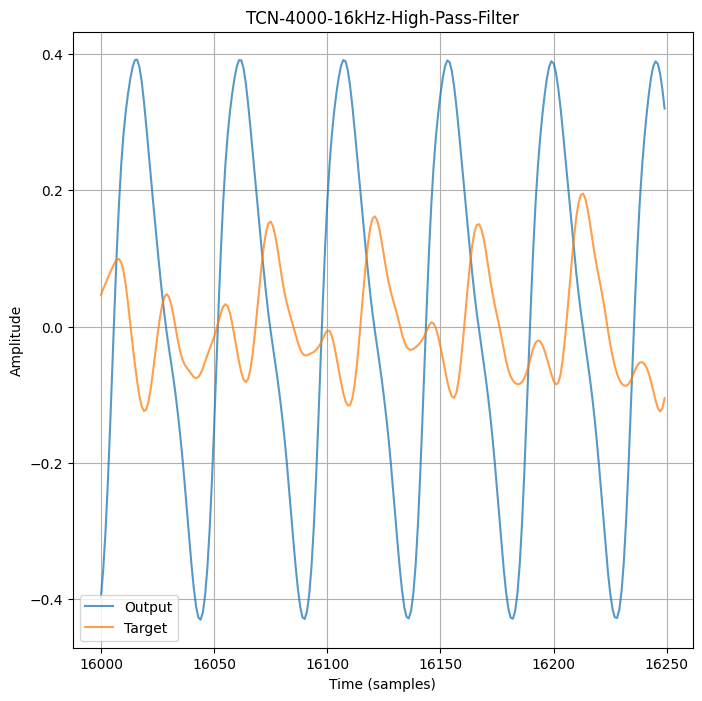

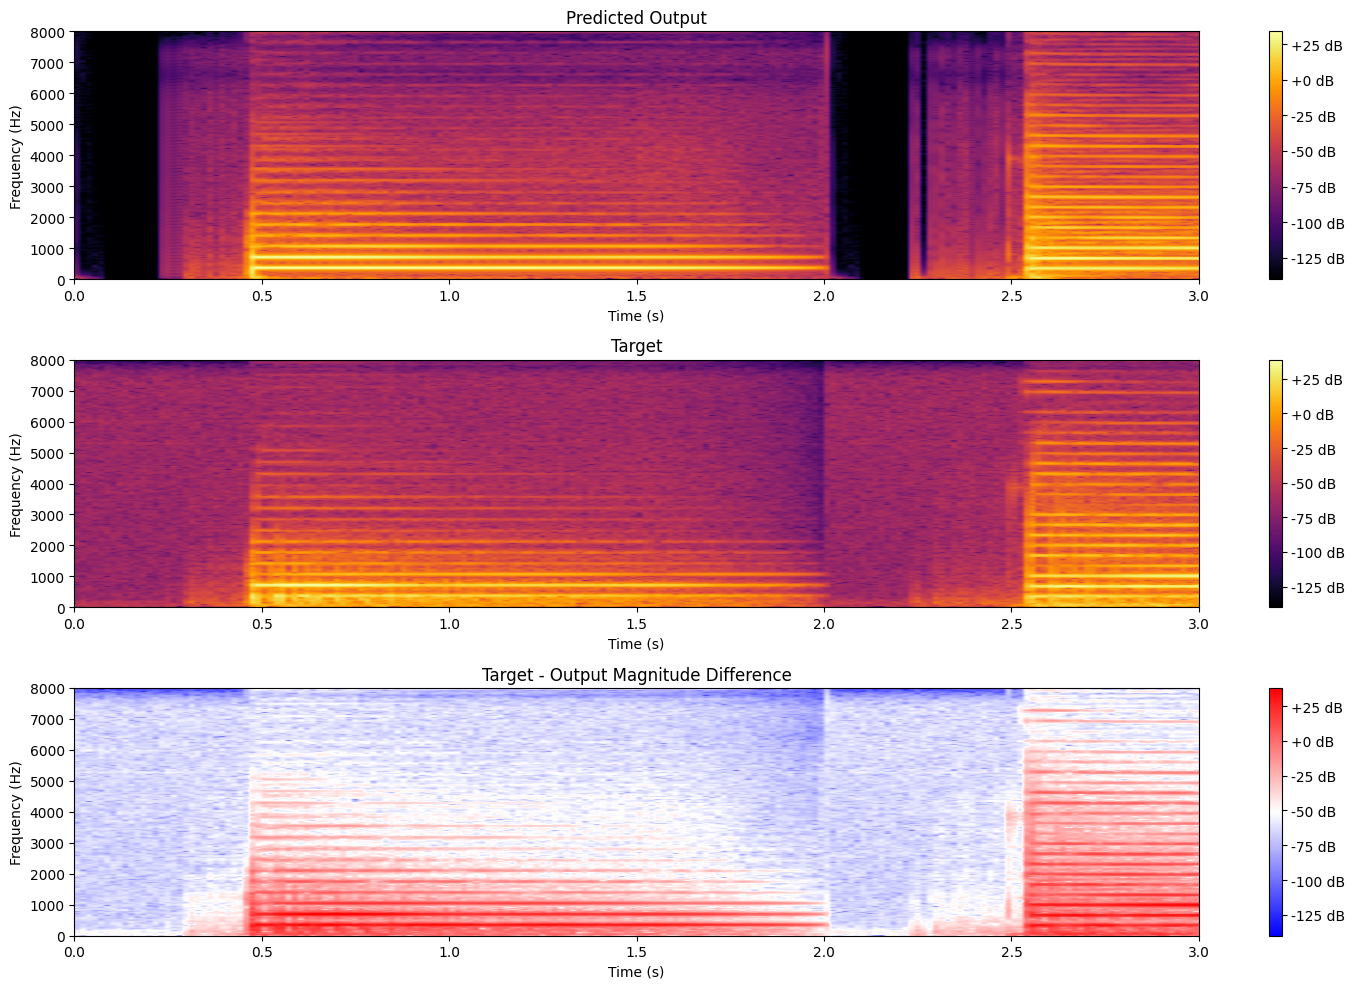

In [13]:
title = "TCN-4000-16kHz-High-Pass-Filter"

o_tcn, _ = torchaudio.load("results/16k/test/tcn-4000_20230825-223034_20230829_031848/out_tcn-4000.wav")
t_tcn, _ = torchaudio.load("results/16k/test/tcn-4000_20230825-223034_20230829_031848/tgt_tcn-4000.wav")

o = o_tcn.numpy().squeeze()
t = t_tcn.numpy().squeeze()


overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

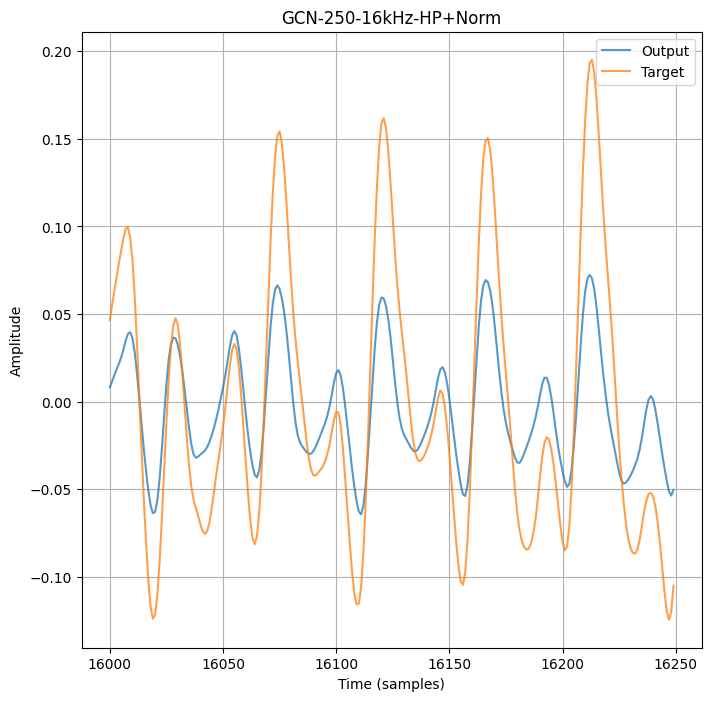

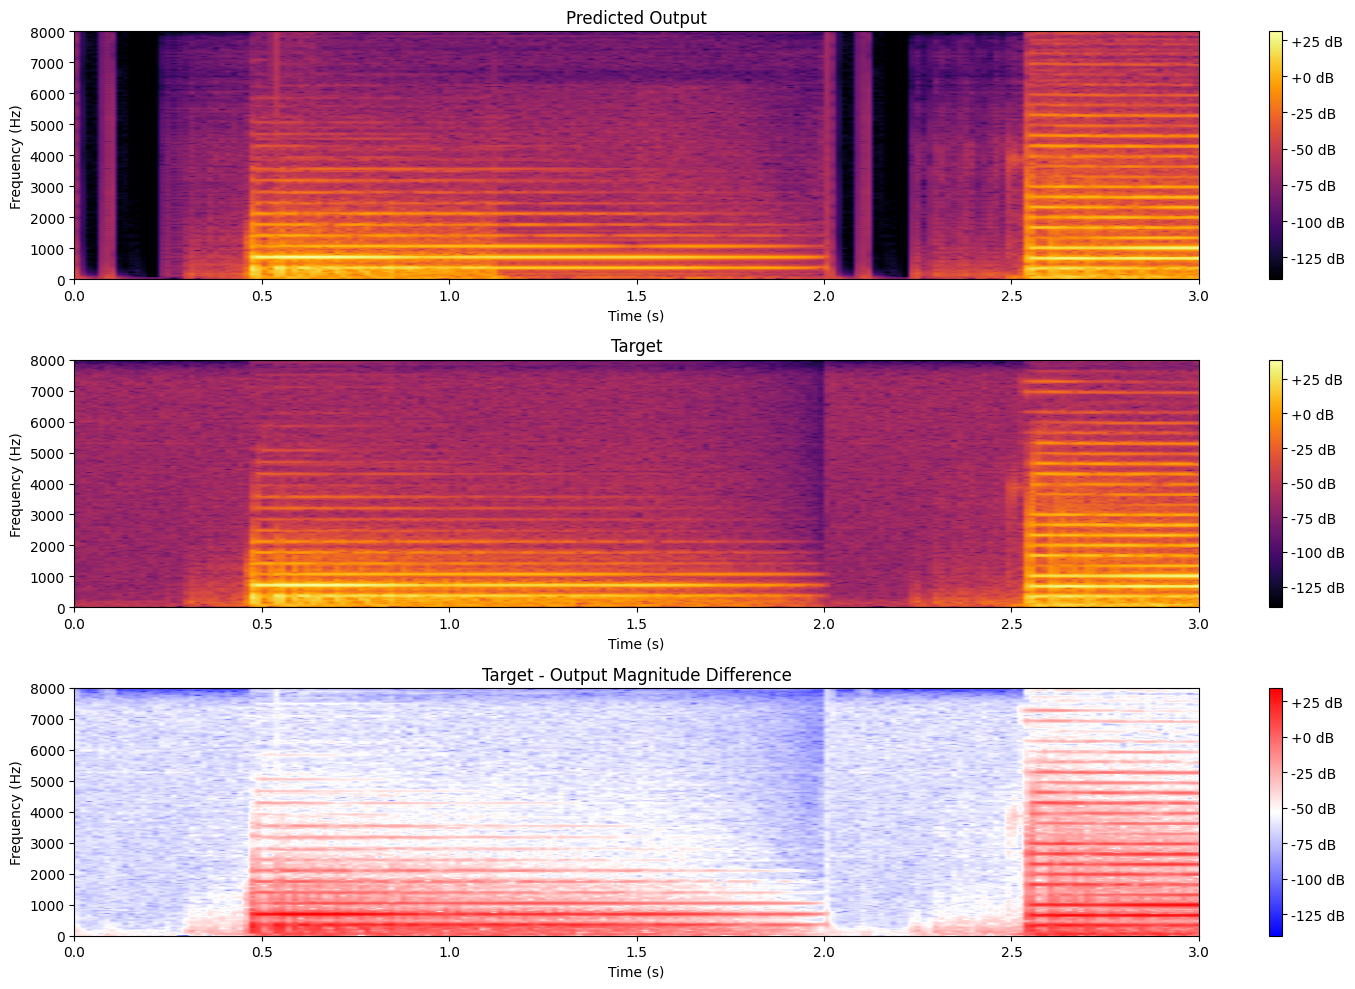

In [16]:
o_p, sample_rate = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_034725/out_gcn-250.wav")
t_p, t_sr = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_034725/tgt_gcn-250.wav")

i = i_p.numpy().reshape(-1)
o = o_p.numpy().reshape(-1)
t = t_p.numpy().reshape(-1)

title = "GCN-250-16kHz-HP+Norm"

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

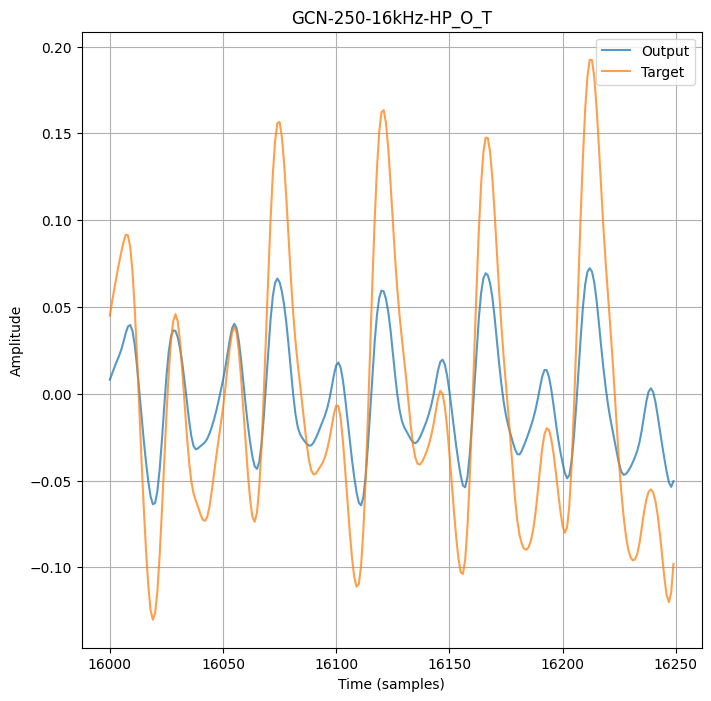

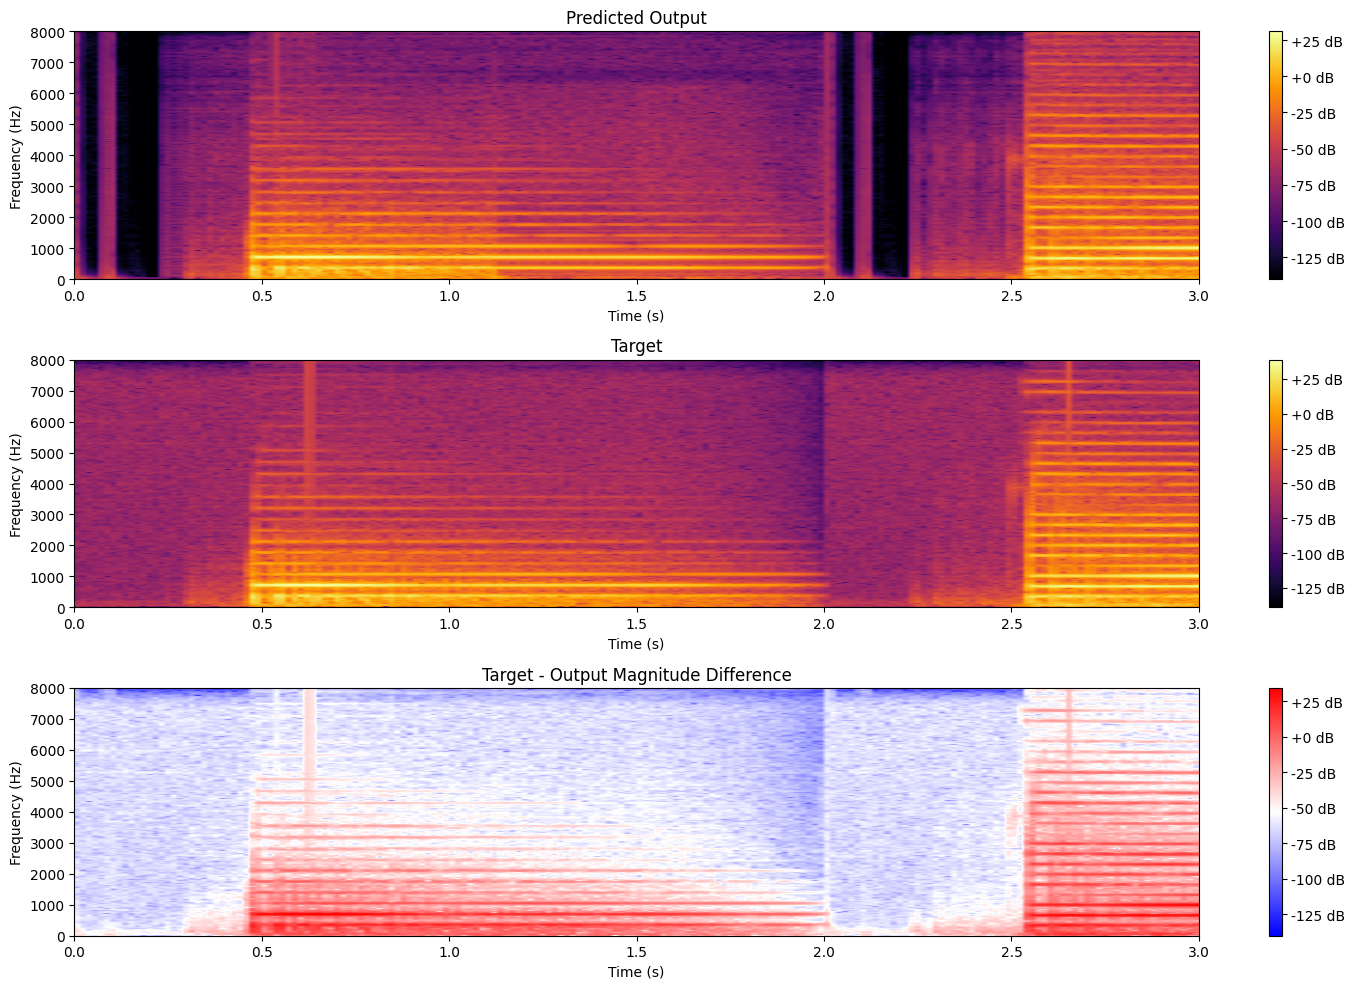

In [17]:
o_p, sample_rate = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_040233/out_gcn-250.wav")
t_p, t_sr = torchaudio.load("results/16k/test/gcn-250_20230824-180806_20230829_040233/tgt_gcn-250.wav")

i = i_p.numpy().reshape(-1)
o = o_p.numpy().reshape(-1)
t = t_p.numpy().reshape(-1)

title = "GCN-250-16kHz-HP_O_T"

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

In [15]:
# Convolve the sweep tone with the inverse filter
impulse_response = np.convolve(sweep_output, inverse_filter)
print(impulse_response.shape)

# Normalize the impulse response
impulse_response /= np.max(np.abs(impulse_response))
    
# Only create a single subplot for the spectrogram
fig, ax = plt.subplots(figsize=(10, 8))

# model_label = hparams['conf_name']
ax.set_title(f'Model: {model_label} Spectrogram')

# Plot the spectrogram
cax = ax.specgram(impulse_response, NFFT=512, Fs=sample_rate, noverlap=256, cmap='hot', scale='dB', mode='magnitude', vmin=-100, vmax=0)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

# Add the colorbar
cbar = fig.colorbar(mappable=cax[3], ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.savefig(f"results/measured_IR/{Path(checkpoint).stem}_IR.png")
print(f"Saved spectrogram plot to {Path(checkpoint).stem}_IR.png")

ir_tensor = torch.from_numpy(impulse_response).unsqueeze(0).float()
save_as = f"{Path(checkpoint).stem}_IR.wav"
torchaudio.save(save_as, ir_tensor, sample_rate, bits_per_sample=bit_depth)
print(f"Saved measured impulse response to {save_as}, sample rate: {sample_rate}, bit depth: {bit_depth}")

NameError: name 'sweep_output' is not defined

In [ ]:
sample_rate = 48000
sweep_output = Path('results/measured_IR/BX20_ableton.wav')
inverse_filter = Path('')

In [ ]:
max_len = max(len(o), len(t))
o = np.pad(o, (0, max_len - len(o)))
t = np.pad(t, (0, max_len - len(t)))


# 1. Compute the STFT for both signals
Pxx_o, freqs_o, t_o, _= plt.specgram(o, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
Pxx_t, freqs_t, t_t, _ = plt.specgram(t, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
plt.close()
# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_t + 1e-7) - 10 * np.log10(Pxx_o + 1e-7)  # Convert to dB and then subtract

# difference = Pxx_o - Pxx_t

# 3. Plot the difference
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o[0], t_o[-1], freqs_o[0], freqs_o[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

In [ ]:
import librosa

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Setting sample rate and STFT parameters
sample_rate = 48000
n_fft_value = 512  # Adjust as needed for frequency resolution
hop_length_value = 256  # Adjust as needed for time resolution

x = o
y = t
z = np.convolve(x, y, mode='full')

x_D = librosa.amplitude_to_db(np.abs(librosa.stft(x, n_fft=n_fft_value, hop_length=hop_length_value)), ref=np.max)
y_D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=n_fft_value, hop_length=hop_length_value)), ref=np.max)
z_D = librosa.amplitude_to_db(np.abs(librosa.stft(z, n_fft=n_fft_value, hop_length=hop_length_value)), ref=np.max)

# Visualizing the Output
x_img = librosa.display.specshow(x_D, y_axis='linear', x_axis='time', sr=sample_rate, ax=axs[0], cmap='hot')
axs[0].set_title('Sweep Tone')
fig.colorbar(x_img, ax=axs[0], format='%+2.0f dB')

# Visualizing the Target
y_img = librosa.display.specshow(y_D, y_axis='linear', x_axis='time', sr=sample_rate, ax=axs[1], cmap='hot')
axs[1].set_title('Inverse Filter')
fig.colorbar(y_img, ax=axs[1], format='%+2.0f dB')

# Visualizing the Difference
diff_img = librosa.display.specshow(z_D, y_axis='linear', x_axis='time', sr=sample_rate, ax=axs[2], cmap='coolwarm')
axs[2].set_title('Measured Impulse Response')
fig.colorbar(diff_img, ax=axs[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [ ]:
def plot_impulse_with_zoom(data, sample_rate, zoom_factor=0.01):
    """
    Plot the waveform and zoom in on the impulse.

    Parameters:
    - data: The impulse signal data.
    - sample_rate: The sample rate of the data.
    - zoom_factor: The fraction of the total duration to show around the impulse.
    """

    # Identify where the impulse is (find the sample with the highest absolute amplitude)
    impulse_index = np.argmax(np.abs(data))

    # Compute the number of samples to show around the impulse for zooming
    samples_to_show = int(sample_rate * zoom_factor)

    # Define start and end indices for the zoomed view
    start_index = max(0, impulse_index - samples_to_show // 2)
    end_index = min(len(data) - 1, impulse_index + samples_to_show // 2)

    # Create plots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # Full waveform
    axs[0].plot(data)
    axs[0].set_title("Full Waveform")
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Amplitude")

    # Zoomed-in waveform
    axs[1].plot(range(start_index, end_index), data[start_index:end_index])
    axs[1].set_title("Zoomed-In on Impulse")
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Test with the impulse signal from the previous code snippet
plot_impulse_with_zoom(recorded, sample_rate)